<a href="https://colab.research.google.com/github/SantoshJambagi2004/Bio_Inspired_Systems/blob/main/LAB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 1, Best Length: 24.191626245470978
Iteration 2, Best Length: 24.191626245470978
Iteration 3, Best Length: 24.191626245470978
Iteration 4, Best Length: 24.191626245470978
Iteration 5, Best Length: 24.191626245470978
Iteration 6, Best Length: 24.191626245470978
Iteration 7, Best Length: 24.191626245470978
Iteration 8, Best Length: 24.191626245470978
Iteration 9, Best Length: 24.191626245470978
Iteration 10, Best Length: 24.191626245470978
Iteration 11, Best Length: 24.191626245470978
Iteration 12, Best Length: 24.191626245470978
Iteration 13, Best Length: 24.191626245470978
Iteration 14, Best Length: 24.191626245470978
Iteration 15, Best Length: 24.191626245470978
Iteration 16, Best Length: 24.191626245470978
Iteration 17, Best Length: 24.191626245470978
Iteration 18, Best Length: 24.191626245470978
Iteration 19, Best Length: 24.191626245470978
Iteration 20, Best Length: 24.191626245470978
Iteration 21, Best Length: 24.191626245470978
Iteration 22, Best Length: 24.1916262454709

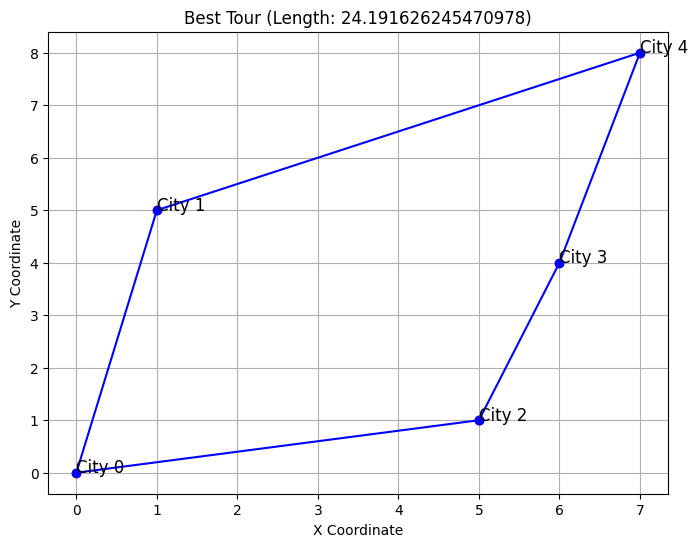

In [3]:
#ant colony
import numpy as np
import matplotlib.pyplot as plt

# 1. Define the Problem: Create a set of cities with their coordinates
cities = np.array([
    [0, 0],  # City 0
    [1, 5],  # City 1
    [5, 1],  # City 2
    [6, 4],  # City 3
    [7, 8],  # City 4
])

# Calculate the distance matrix between each pair of cities
def calculate_distances(cities):
    num_cities = len(cities)
    distances = np.zeros((num_cities, num_cities))

    for i in range(num_cities):
        for j in range(num_cities):
            distances[i][j] = np.linalg.norm(cities[i] - cities[j])

    return distances

distances = calculate_distances(cities)

# 2. Initialize Parameters
num_ants = 10
num_cities = len(cities)
alpha = 1.0  # Influence of pheromone
beta = 5.0   # Influence of heuristic (inverse distance)
rho = 0.5    # Evaporation rate
num_iterations = 30
initial_pheromone = 1.0

# Pheromone matrix initialization
pheromone = np.ones((num_cities, num_cities)) * initial_pheromone

# 3. Heuristic information (Inverse of distance)
def heuristic(distances):
    with np.errstate(divide='ignore'):  # Ignore division by zero
        return 1 / distances

eta = heuristic(distances)

# 4. Choose next city probabilistically based on pheromone and heuristic info
def choose_next_city(pheromone, eta, visited):
    probs = []
    for j in range(num_cities):
        if j not in visited:
            pheromone_ij = pheromone[visited[-1], j] ** alpha
            heuristic_ij = eta[visited[-1], j] ** beta
            probs.append(pheromone_ij * heuristic_ij)
        else:
            probs.append(0)
    probs = np.array(probs)
    return np.random.choice(range(num_cities), p=probs / probs.sum())

# Construct solution for a single ant
def construct_solution(pheromone, eta):
    tour = [np.random.randint(0, num_cities)]
    while len(tour) < num_cities:
        next_city = choose_next_city(pheromone, eta, tour)
        tour.append(next_city)
    return tour

# 5. Update pheromones after all ants have constructed their tours
def update_pheromones(pheromone, all_tours, distances, best_tour):
    pheromone *= (1 - rho)  # Evaporate pheromones

    # Add pheromones for each ant's tour
    for tour in all_tours:
        tour_length = sum([distances[tour[i], tour[i + 1]] for i in range(-1, num_cities - 1)])
        for i in range(-1, num_cities - 1):
            pheromone[tour[i], tour[i + 1]] += 1.0 / tour_length

    # Increase pheromones on the best tour
    best_length = sum([distances[best_tour[i], best_tour[i + 1]] for i in range(-1, num_cities - 1)])
    for i in range(-1, num_cities - 1):
        pheromone[best_tour[i], best_tour[i + 1]] += 1.0 / best_length

# 6. Main ACO Loop: Iterate over multiple iterations to find the best solution
def run_aco(distances, num_iterations):
    pheromone = np.ones((num_cities, num_cities)) * initial_pheromone
    best_tour = None
    best_length = float('inf')

    for iteration in range(num_iterations):
        all_tours = [construct_solution(pheromone, eta) for _ in range(num_ants)]
        all_lengths = [sum([distances[tour[i], tour[i + 1]] for i in range(-1, num_cities - 1)]) for tour in all_tours]

        current_best_length = min(all_lengths)
        current_best_tour = all_tours[all_lengths.index(current_best_length)]

        if current_best_length < best_length:
            best_length = current_best_length
            best_tour = current_best_tour

        update_pheromones(pheromone, all_tours, distances, best_tour)

        print(f"Iteration {iteration + 1}, Best Length: {best_length}")

    return best_tour, best_length

# Run the ACO algorithm
best_tour, best_length = run_aco(distances, num_iterations)

# 7. Output the Best Solution
print(f"Best Tour: {best_tour}")
print(f"Best Tour Length: {best_length}")

# 8. Plot the Best Route
def plot_route(cities, best_tour):
    plt.figure(figsize=(8, 6))
    for i in range(len(cities)):
        plt.scatter(cities[i][0], cities[i][1], color='red')
        plt.text(cities[i][0], cities[i][1], f"City {i}", fontsize=12)

    # Plot the tour as lines connecting the cities
    tour_cities = np.array([cities[i] for i in best_tour] + [cities[best_tour[0]]])  # Complete the loop by returning to the start
    plt.plot(tour_cities[:, 0], tour_cities[:, 1], linestyle='-', marker='o', color='blue')

    plt.title(f"Best Tour (Length: {best_length})")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True)
    plt.show()

# Call the plot function
plot_route(cities, best_tour)